# Lecture 4: General Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from func import Func

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

## Saddle Points

A saddle point is a point where the gradient is zero (critical point) but is neither a minimum nor a maximum. In fact, this
point is a maximum from one direction and a minimum from the other direction. Saddle point can cause problems when searching for extrema.

To determine whether a point is a saddle point, we need to compute the eigenvalues of the Hessian matrix at the critical point.

<img src="figures/lecture-04/minmaxsaddle.png" width="600" />


---
### Example 1

In [2]:
def create_f1():
    x, y = sy.symbols('x, y')
    f = x**2*y  -  2*x*y**2  +  3*x*y  +  4
    return Func(f, (x, y))

f1 = create_f1()
f1

⎡ 2          2            ⎤
⎣x ⋅y - 2⋅x⋅y  + 3⋅x⋅y + 4⎦

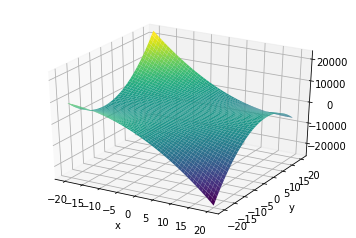

In [3]:
f1.plot((-20, 20), (-20, 20))

In [4]:
f1.find_critical_points()

The point (-3, 0) is a saddle point.
The point (-1, 1/2) is a local minimum.
The point (0, 0) is a saddle point.
The point (0, 3/2) is a saddle point.


---
### Example 2

In [5]:
def create_f2():
    x1, x2 = sy.symbols('x1, x2', real=True)
    f = -x2**2 + (x1-x1)
    return Func(f, (x1, x2))
f2 = create_f2()
f2

⎡   2⎤
⎣-x₂ ⎦

In [6]:
f2.gradient_at((0, 0))

[0  0]

In [7]:
f2.classify_critical_point((0, 0))

'The point (0, 0) is a local maximum.'

---
### Example 3


<img src="figures/lecture-04/example-6.3.png" width="600" />



In [8]:
def create_f3():
    x1, x2 = sy.symbols('x1, x2', real=True)
    f = x1**2  + 0.5*x2**2  +  3*x2 + 4.5
    return Func(f, (x1, x2))
f3 = create_f3()
f3

⎡  2         2             ⎤
⎣x₁  + 0.5⋅x₂  + 3⋅x₂ + 4.5⎦

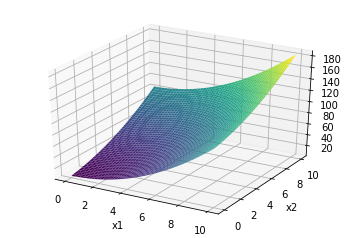

In [9]:
f3.plot((0, 10), (0, 10))

---

<img src="figures/lecture-04/example-6.3-a.png" width="600" />


In order to check whether a point $x^{*}$ satisfies the FONC, we need to check two cases:

1. Is $x^{*}$ an interior point? In this case, the equation $\triangledown f(x^{*}) = 0$ must be satisfied.
2. Is the point $x^{*}$ at the border? We need to check whether the equation $d \cdot \triangledown f(x^{*}) \geq 0$ is true for all feasible directions $d$.

Let us check whether FONC is satisfied at $[1,3]^T$. 

This point is an interior point because $1 \geq 0$ ($x_1 \geq 0$) and $3 \geq 0$ ($x_2 \geq 0$)

Now, we check whether $\triangledown f(x^{*})$ yields $0$:

In [10]:
f3.gradient_at((1, 3))

[2  6.0]

Since  $\triangledown f(x^{*}) = [2, 6]^T \neq [0, 0]^T$, the point $x^{*}$ does not satisfy the FONC.

---

<img src="figures/lecture-04/example-6.3-b.png" width="600" />


The point $x^{*} = [0, 3]^T$ is at the border because $0 \geq 0$ ($x_1 \geq 0$) and $3 \geq 0$ ($x_2 \geq 0$).

We check if $d \cdot \triangledown f(x^{*}) \geq 0$ is true for all feasible directions $d$.

Let us plot the point to make it easier for us to visualise the feasible set.

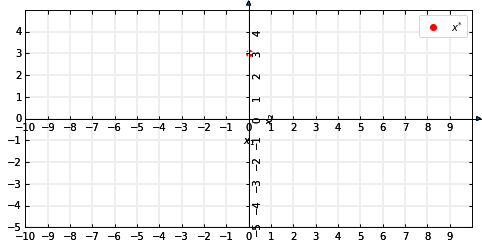

In [11]:
f3.plot_point((0, 3))

For the vector $d=[d_1, d_2]$, feasible directions are as follows: 

- In the first axis, $d_1 \geq 0$ 
- In the second axis $d_2$ can be any number, which means that it can be negative.

Let us compute the equation at point $[0, 3]$:

In [12]:
f3.fonc_at((0, 3))

Since $d_2$ can be negative, the FONC is not satisfied.

---

<img src="figures/lecture-04/example-6.3-c.png" width="600" />


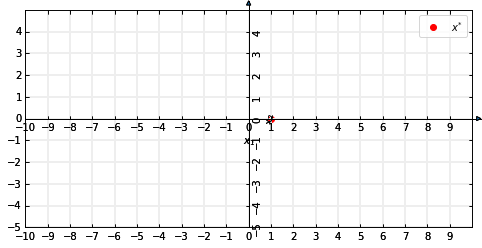

In [13]:
f3.plot_point((1, 0))

For the vector $d=[d_1, d_2]$, feasible directions are as follows: 

- In the first axis, $d_1$ can be any number in $\mathbb{R}$.
- In the second axis $d_2 \geq 0$ 

Let us compute the FONC equation at point $[1, 0]$:

In [14]:
f3.fonc_at((1, 0))

If we let $d=[-1, 0]^T$ (which is a feasible direction), then we have $2(-1) + 3(0) = -2$. The FONC is not satisfied

---

<img src="figures/lecture-04/example-6.3-d.png" width="600" />




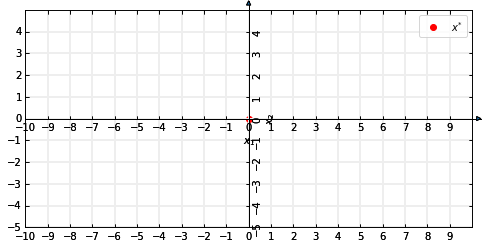

In [15]:
f3.plot_point((0, 0))

For the vector $d=[d_1, d_2]$, feasible directions are as follows: 

- In the first axis, $d_1 \geq 0$
- In the second axis $d_2 \geq 0$ 

Let us compute the FONC equation at point $[0, 0]$:

In [16]:
f3.fonc_at((0, 0))

If we let $d=[0, 0]^T$ (which is the smallest feasible direction), then we have $3(0) = 0$. The FONC is satisfied!